# PROJECT 1 ASSIGNMENT

### Import the necessary libraries 

In [63]:
import pandas as pd
import numpy as np
from numbers import Number
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Load the dataset
### The encoding parameter is used to handle any special characters that may be present in the file.

In [2]:
df = pd.read_csv('AviationData.csv', encoding='latin-1')

In [3]:
# Display the first few rows of the dataframe.
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Display the first few rows of the dataframe.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
# Display the last few rows of the dataframe
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
df.shape

(88889, 31)

## CLEANING THE DATA

In [9]:
print(df.isnull().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [10]:
#   - Handle missing values (e.g., drop rows, fill with mean/median/mode, or use imputation techniques)
df.fillna(method='ffill', inplace=True)  # Forward-fill missing values

In [11]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


### Convert 'Publication.Date' and 'Event.Date' columns to datetime objects.
### Convert specific columns to integer type.

In [12]:
#   - Convert columns to appropriate data types (e.g., date, numerical)
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].astype(int)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].astype(int)
df['Total.Uninjured'] = df['Total.Uninjured'].astype(int)
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [13]:
# Mode imputation for 'Airport.Code'
df['Airport.Code'].fillna(df['Airport.Code'].mode()[0], inplace=True)

In [14]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NONE,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NONE,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,3,0,0,0,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,1,2,0,0,VMC,Approach,Probable Cause,1980-04-16


In [15]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NONE,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NONE,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,3,0,0,0,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,1,2,0,0,VMC,Approach,Probable Cause,1980-04-16


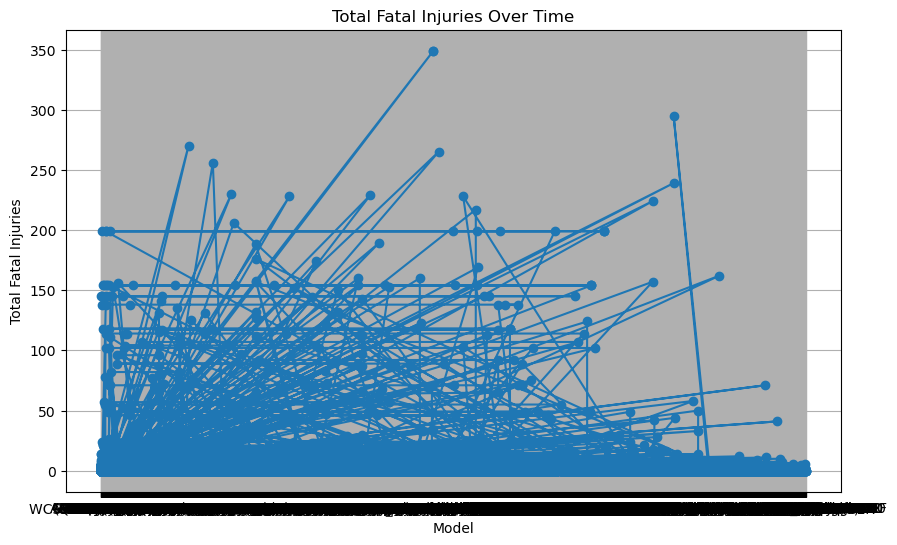

In [16]:
# Analyze accident trends over time
plt.figure(figsize=(10, 6))
plt.plot(df['Model'], df['Total.Fatal.Injuries'], marker='o')
plt.title('Total Fatal Injuries Over Time')
plt.xlabel('Model')
plt.ylabel('Total Fatal Injuries')
plt.grid(True)
plt.show()

#### Check for and handle any remaining missing values after initial cleaning
#### Further data cleaning based on specific column needs
##### Example: If 'Latitude' or 'Longitude' have missing values, consider imputation or removal
##### ... (add more specific cleaning steps as needed)

In [31]:
print(df.isnull().sum())

# Remove rows where 'Total.Fatal.Injuries' are greater than the total number of people involved
total_injured = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']
df = df[df['Total.Fatal.Injuries'] <= total_injured]


# Ensure consistent data types across the dataframe
for col in df.columns:
    if df[col].dtype == 'object':
        try:
          df[col] = pd.to_numeric(df[col])
        except ValueError:
          pass  # Skip if conversion to numeric fails

# Example: Handling inconsistent values in a categorical column (replace with appropriate values)
#df['Make'] = df['Make'].replace({'CESSNA AIRCRAFT': 'CESSNA'})  # Replace inconsistent entries


# Drop rows where 'Total.Fatal.Injuries' is negative (if any)
df = df[df['Total.Fatal.Injuries'] >= 0]

df.head()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  2
Longitude                 2
Airport.Code              0
Airport.Name              7
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         5
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           5
Schedule                  5
Purpose.of.flight         0
Air.carrier               5
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          1
dtype: int64


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NONE,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NONE,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,3,0,0,0,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,36.922223,-81.878056,NONE,NaN,...,Personal,NaN,1,2,0,0,VMC,Approach,Probable Cause,1980-04-16


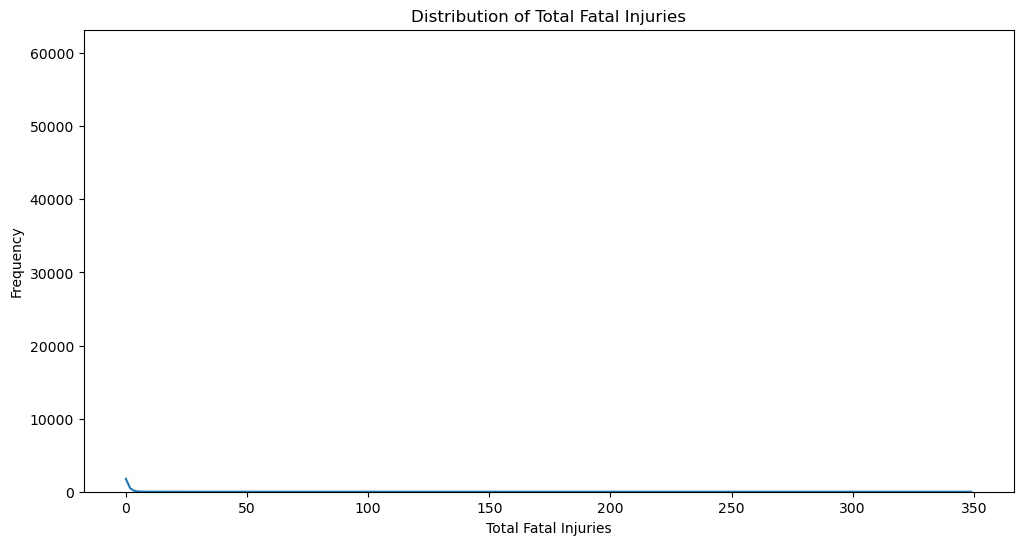

In [44]:

# Analyze injury severity distribution
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_columns].describe()

# Visualize the distribution of total fatal injuries using a histogram.
plt.figure(figsize=(12, 6))
sns.histplot(df['Total.Fatal.Injuries'], kde=True)
plt.title('Distribution of Total Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.show()




### Investigate the relationship between aircraft make and fatal injuries using a boxplot.

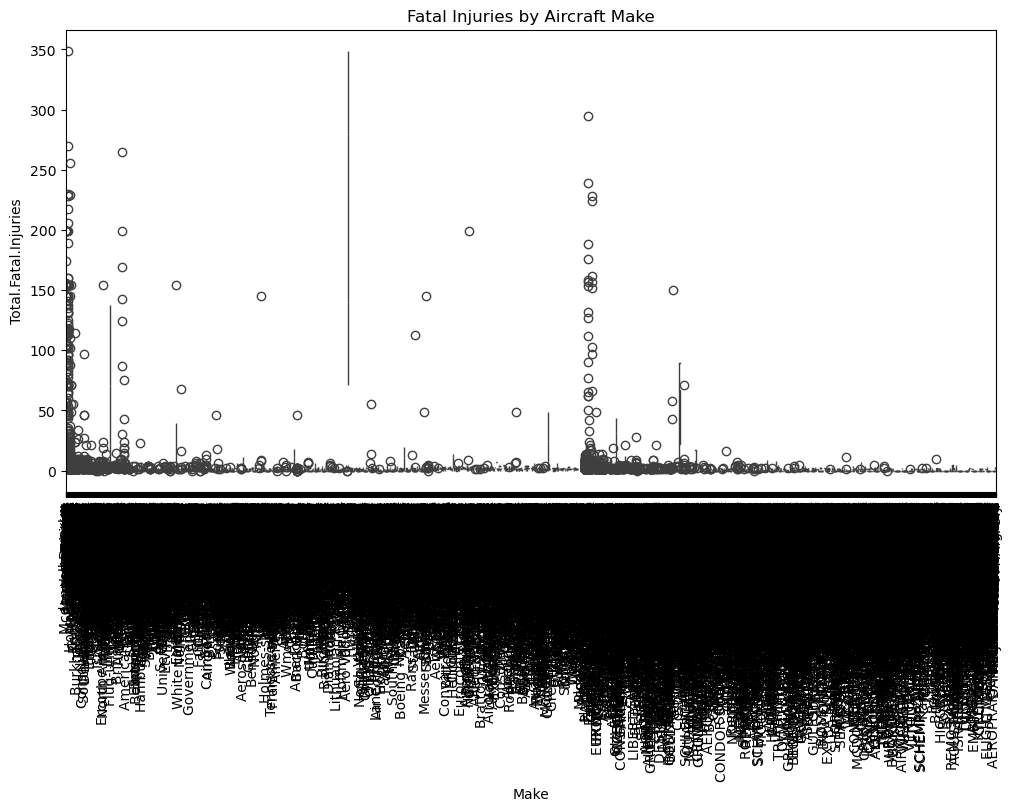

In [47]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Total.Fatal.Injuries', data=df)
plt.xticks(rotation=90)
plt.title('Fatal Injuries by Aircraft Make')
plt.show()


### Analyze the correlation between features using a heatmap.

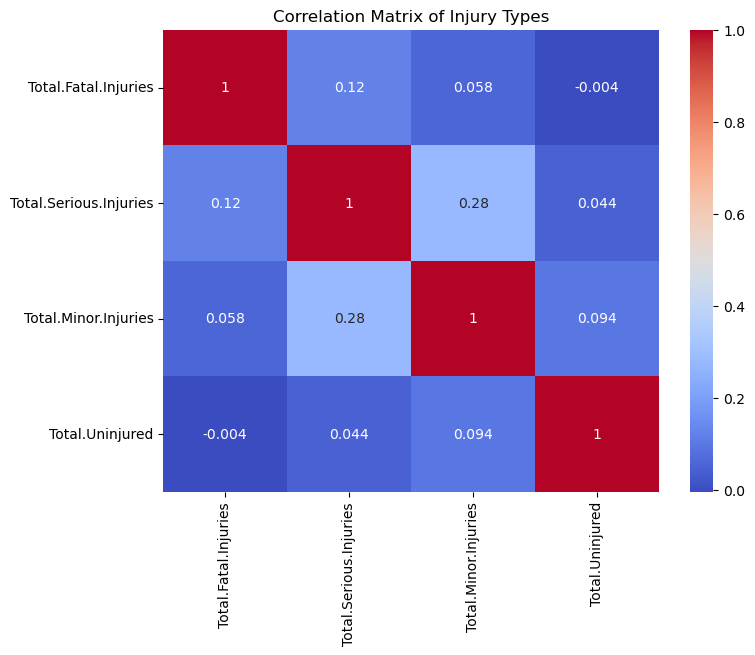

In [48]:

correlation_matrix = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Injury Types')
plt.show()

### Analyze the relationship between the year of the event and total fatal injuries

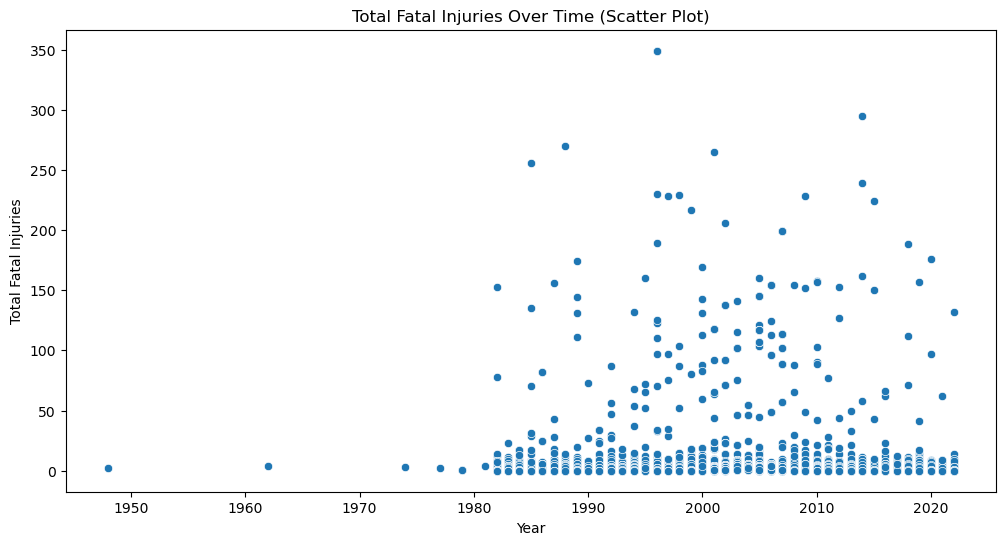

In [35]:

df['Event.Year'] = df['Event.Date'].dt.year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Event.Year', y='Total.Fatal.Injuries', data=df)
plt.title('Total Fatal Injuries Over Time (Scatter Plot)')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.show()

### Analyze the relationship between the year and total fatal injuries using a scatterplot.

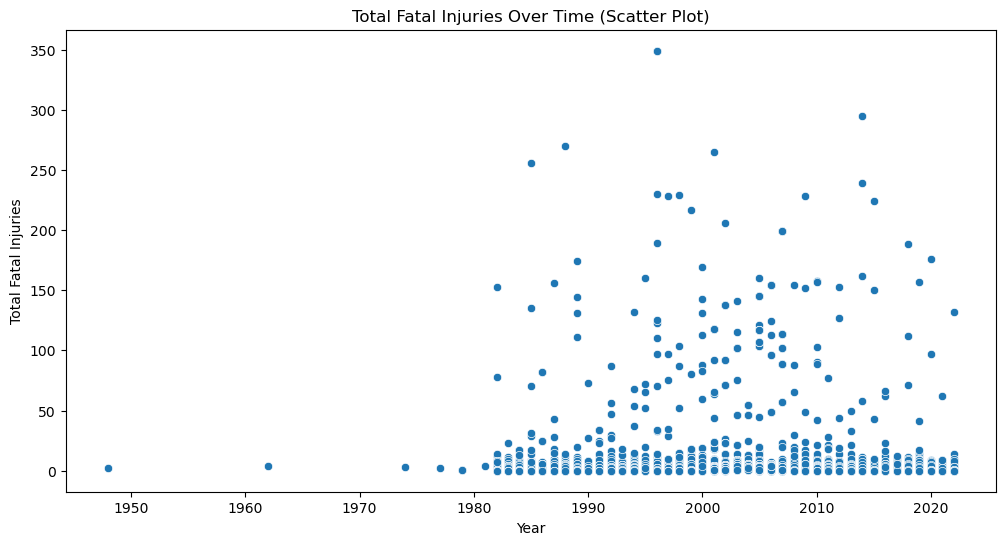

In [42]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Event.Year', y='Total.Fatal.Injuries', data=df)
plt.title('Total Fatal Injuries Over Time (Scatter Plot)')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.show()

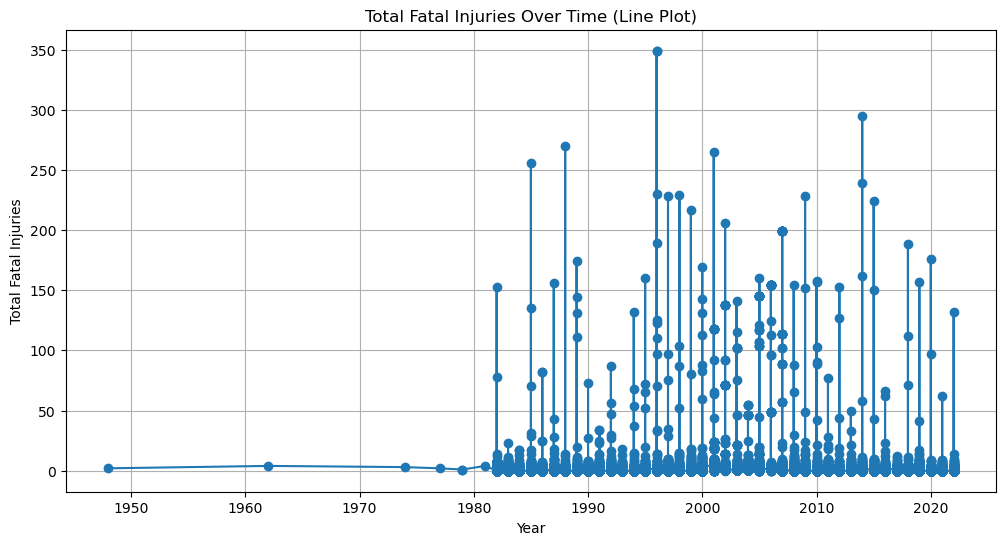

In [59]:
# Analyze the relationship between the year of the event and total fatal injuries using a line graph
plt.figure(figsize=(12, 6))
plt.plot(df['Event.Year'], df['Total.Fatal.Injuries'], marker='o', linestyle='-')  # Added linestyle
plt.title('Total Fatal Injuries Over Time (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.grid(True)  # Add grid for better readability
plt.show()

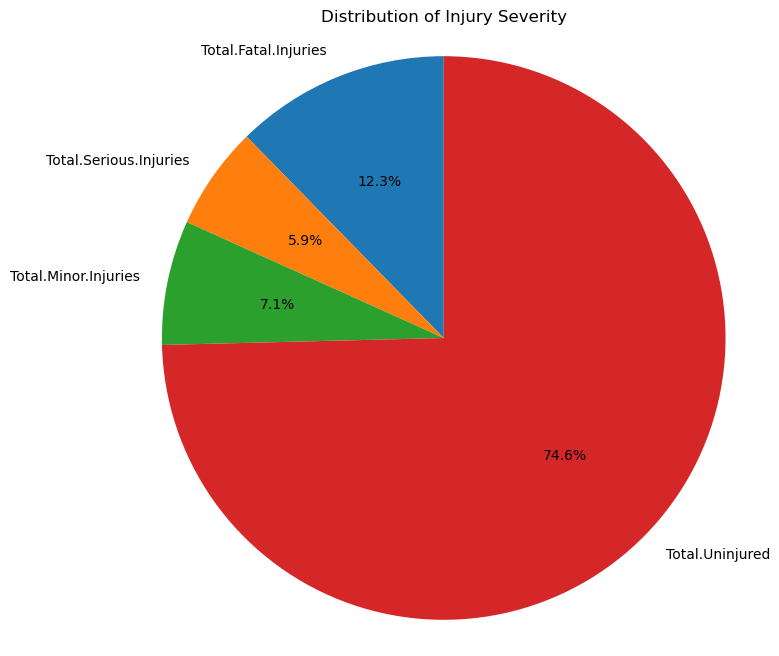

In [61]:
# Assuming 'injury_columns' from your existing code holds the relevant data
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injury_data = df[injury_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(injury_data, labels=injury_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Injury Severity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()